In [ ]:
# Clustering - only works with CONTINUOUS DATA except K Mode

# Hierarchal - Social Networks (connections)
# Fuzzy - Looks for belonging - NLP can help? 

# K Means - don't use on a line, don't use if the variance doesn't have a pattern, needs groups of equal variance -user sets # of clusters
# Inertia - is the distance inside of a cluster is the distance from the centroid 
# How to evaluate: The Elbow Method - 


# K Modes - Can be used with Categorical Data set

# DBSCAN - doesn't need circular blobs - will dismiss the middle if its noisy - doesn't need circular data - needs high density clusters
# Even if the clusters are cleanly seperated but not dense, it will not work well
# Doesn't require us to set number of clusters

# Mean Shift - clusters by identifying blobs through centroids

# Agglomerative Hierarchal Clustering - builds trees until they converge - good for gene problems (species etc.)
# Single linkage - doesn't work well on noisy data 

# Affinity Propagation - creates clusters by pairs of samples - still works better on circular data 
# - uses sum of squares - self determines cluster number

# After you get the customers into the clusters you want, then try to classify them with a classification model to find
# common traits of the customers in the cluster




In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

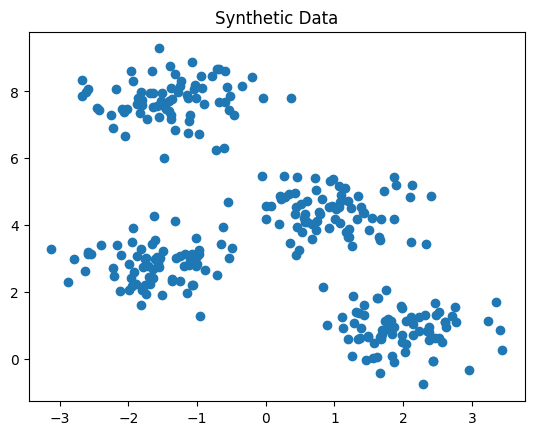

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.title('Synthetic Data')
plt.show()

In [7]:
inertia =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [8]:
inertia

[2812.1375953032334,
 1439.861395200538,
 546.8911504626299,
 212.00599621083478,
 194.96601623554267,
 177.86899482176705,
 164.95621431910737,
 143.96669359684986,
 133.6180436385599,
 116.0059973238808]

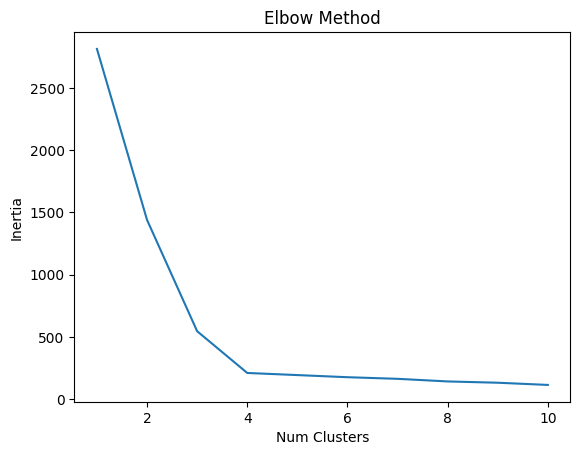

In [9]:
plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.show()

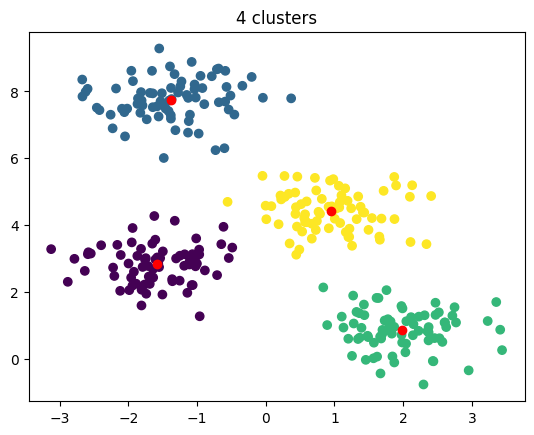

In [27]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels=kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('4 clusters')
plt.show()

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame(X)
df['label'] = labels
df

,0,1,label
0,0.836857,2.136359,2
1,-1.413658,7.409623,1
2,1.155213,5.099619,3
3,-1.018616,7.814915,1
4,1.271351,1.892542,2
...,...,...,...
295,1.973698,1.579798,2
296,2.518342,1.391766,2
297,0.438990,4.535929,3
298,0.369479,7.791105,1


In [31]:
# Once you have your clusters, you would make a classification model to classify new data/customers as they come in
# Also analyze the clusters to find what makes them distinct

<class 'pandas.core.series.Series'>
RangeIndex: 300 entries, 0 to 299
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
300 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [32]:
# We want this to be around 0.7 to be considered good
# Negative is BAD (shouldn't be lower than 0.5)

sil_score = silhouette_score(X, labels)
print(sil_score)

0.6819938690643478


In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X,method='ward')

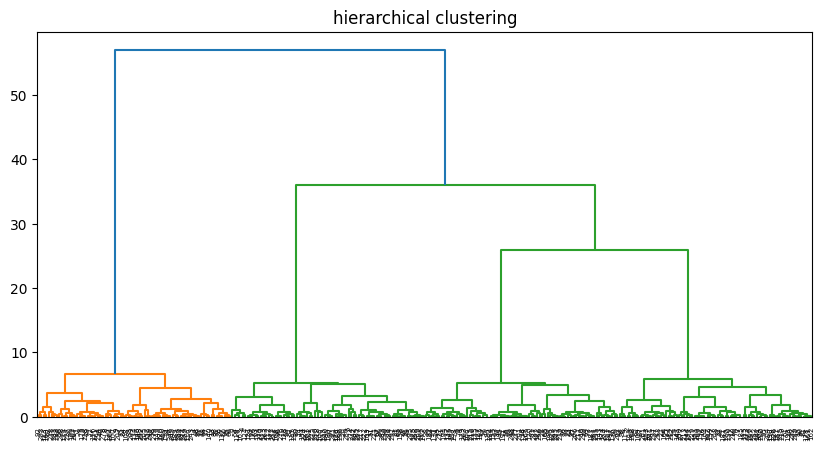

In [34]:
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title('hierarchical clustering')
plt.show()

In [42]:
# 
clusters = fcluster(Z, t=5, criterion='distance') # divide based on distance in this case distance of 5

In [43]:
clusters

array([3, 2, 8, 1, 3, 5, 6, 9, 1, 1, 7, 2, 9, 2, 4, 9, 9, 5, 7, 6, 5, 5,
       8, 7, 6, 8, 5, 8, 7, 8, 1, 2, 9, 2, 2, 2, 2, 2, 6, 3, 9, 6, 8, 9,
       6, 7, 1, 7, 2, 5, 7, 5, 1, 3, 3, 7, 1, 6, 2, 3, 2, 9, 1, 7, 7, 7,
       2, 5, 2, 7, 9, 7, 1, 7, 6, 1, 7, 9, 5, 1, 4, 9, 3, 5, 1, 8, 5, 8,
       2, 2, 9, 5, 1, 7, 7, 9, 3, 5, 8, 7, 1, 4, 1, 5, 9, 5, 4, 9, 2, 8,
       6, 7, 3, 1, 3, 9, 2, 3, 3, 8, 7, 3, 7, 3, 3, 5, 3, 6, 3, 6, 1, 6,
       6, 4, 2, 6, 7, 2, 9, 1, 2, 7, 9, 7, 9, 6, 2, 8, 2, 2, 2, 9, 2, 8,
       4, 7, 1, 6, 5, 9, 1, 9, 9, 3, 8, 7, 6, 8, 3, 9, 9, 1, 3, 9, 7, 1,
       5, 5, 9, 7, 5, 9, 6, 7, 8, 9, 8, 9, 5, 2, 9, 7, 9, 9, 6, 6, 7, 9,
       6, 2, 9, 7, 4, 6, 9, 2, 7, 1, 9, 2, 9, 7, 8, 9, 2, 6, 6, 5, 4, 9,
       2, 5, 5, 7, 4, 7, 9, 1, 1, 9, 9, 1, 9, 3, 7, 9, 5, 7, 1, 7, 5, 8,
       5, 2, 2, 2, 2, 7, 7, 2, 9, 7, 3, 8, 7, 7, 7, 5, 5, 2, 9, 8, 7, 3,
       1, 7, 9, 1, 8, 5, 3, 7, 6, 9, 5, 4, 3, 9, 1, 2, 5, 5, 9, 5, 5, 5,
       2, 7, 1, 9, 4, 5, 2, 1, 1, 5, 5, 8, 1, 7], d

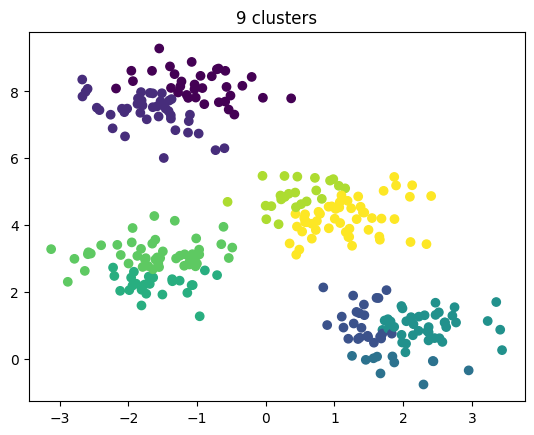

In [44]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.title('9 clusters')
plt.show()

In [39]:
# t=5 in this case means we want to create 5 clusters MAX
clusters = fcluster(Z, t=5, criterion='maxclust') 

In [40]:
clusters

array([3, 2, 5, 1, 3, 3, 4, 5, 1, 1, 4, 2, 5, 2, 3, 5, 5, 3, 4, 4, 3, 3,
       5, 4, 4, 5, 3, 5, 4, 5, 1, 2, 5, 2, 2, 2, 2, 2, 4, 3, 5, 4, 5, 5,
       4, 4, 1, 4, 2, 3, 4, 3, 1, 3, 3, 4, 1, 4, 2, 3, 2, 5, 1, 4, 4, 4,
       2, 3, 2, 4, 5, 4, 1, 4, 4, 1, 4, 5, 3, 1, 3, 5, 3, 3, 1, 5, 3, 5,
       2, 2, 5, 3, 1, 4, 4, 5, 3, 3, 5, 4, 1, 3, 1, 3, 5, 3, 3, 5, 2, 5,
       4, 4, 3, 1, 3, 5, 2, 3, 3, 5, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 1, 4,
       4, 3, 2, 4, 4, 2, 5, 1, 2, 4, 5, 4, 5, 4, 2, 5, 2, 2, 2, 5, 2, 5,
       3, 4, 1, 4, 3, 5, 1, 5, 5, 3, 5, 4, 4, 5, 3, 5, 5, 1, 3, 5, 4, 1,
       3, 3, 5, 4, 3, 5, 4, 4, 5, 5, 5, 5, 3, 2, 5, 4, 5, 5, 4, 4, 4, 5,
       4, 2, 5, 4, 3, 4, 5, 2, 4, 1, 5, 2, 5, 4, 5, 5, 2, 4, 4, 3, 3, 5,
       2, 3, 3, 4, 3, 4, 5, 1, 1, 5, 5, 1, 5, 3, 4, 5, 3, 4, 1, 4, 3, 5,
       3, 2, 2, 2, 2, 4, 4, 2, 5, 4, 3, 5, 4, 4, 4, 3, 3, 2, 5, 5, 4, 3,
       1, 4, 5, 1, 5, 3, 3, 4, 4, 5, 3, 3, 3, 5, 1, 2, 3, 3, 5, 3, 3, 3,
       2, 4, 1, 5, 3, 3, 2, 1, 1, 3, 3, 5, 1, 4], d

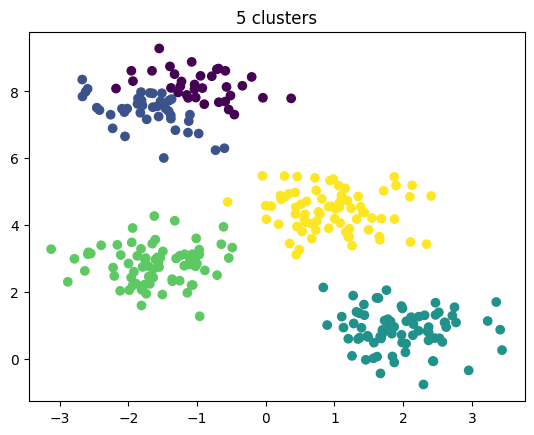

In [41]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.title('5 clusters')
plt.show()

In [49]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels=dbscan.fit_predict(X)

In [50]:
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(dbscan_sil_score)

0.58977292182092


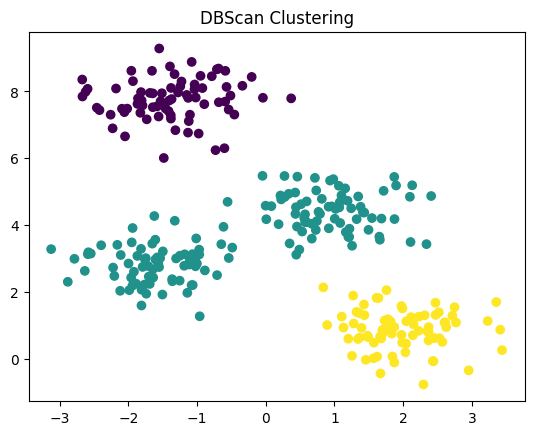

In [51]:
plt.scatter(X[:,0],X[:,1], c=dbscan_labels)
plt.title('DBScan Clustering')
plt.show()

In [59]:
import fileinput
with fileinput.FileInput('C:/Users/etjdr/OneDrive/Desktop/Term 2/MBAN 6120 U - Data Science II/LD2011_2014.txt', inplace=True) as file:
    for line in file:
        print(line.replace(",","."),end='')

In [60]:
df = pd.read_csv("C:/Users/etjdr/OneDrive/Desktop/Term 2/MBAN 6120 U - Data Science II/LD2011_2014.txt", sep=';', index_col=0)

In [61]:
df.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


<Axes: >

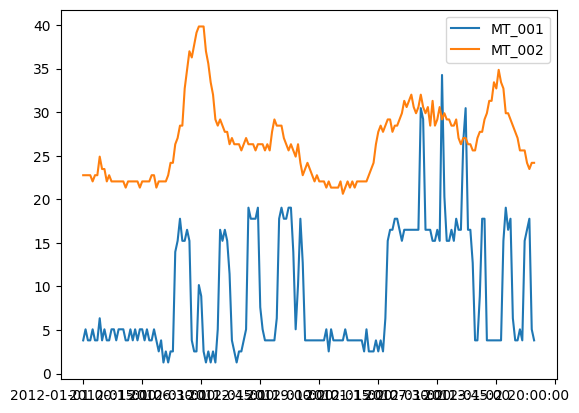

In [62]:
sample = df.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
sample.plot()

In [63]:
data2011 = df.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = df.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = df.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = df.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [68]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0]
data_13_14 = pd.concat([data2013,data2014], axis = 0)
data_13_14 = data_13_14.drop(clients_no_demand, axis=1)

In [69]:
data_13_14.shape

(70080, 349)

In [72]:
df['hour'] = df.index.map(lambda x: x[11:])

In [73]:
datagroup = df.groupby('hour')
avg_curves = datagroup.agg('mean')
avg_curves.shape

(96, 370)

In [74]:
avg_curves_norm = avg_curves / (avg_curves.mean())

<Axes: xlabel='hour'>

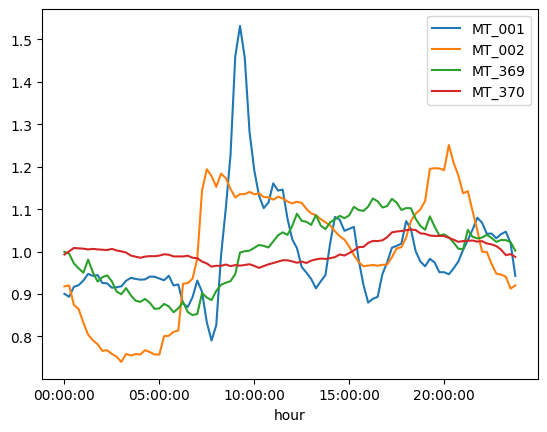

In [76]:
avg_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()

In [78]:
import numpy as np
X = avg_curves_norm.copy()
X = np.array(X.T)

In [79]:
X

array([[0.90037324, 0.89337326, 0.91699821, ..., 1.04693546, 1.02024801,
        0.94259191],
       [0.91786803, 0.9200714 , 0.87422254, ..., 0.94100343, 0.91252369,
        0.92030581],
       [0.98482752, 1.08691702, 1.11198091, ..., 0.99012557, 0.99460855,
        0.9713786 ],
       ...,
       [1.1800464 , 1.22145577, 1.19952039, ..., 1.15930552, 1.13924032,
        1.12407377],
       [0.99924145, 0.99498464, 0.97217252, ..., 1.0269099 , 1.02251665,
        1.00208895],
       [0.99296729, 1.00054813, 1.00851498, ..., 0.99165659, 0.99394714,
        0.98743097]])

In [81]:
def getInertia(X,kmeans):
    inertia = 0
    for J in range(len(x)):
        inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    return inertia

In [82]:
inertia_1 = []
silhouette_avgs = []
max_K = 15
for k in np.arange(1,max_K+1):
    kmeans=KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_1 = inertia_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X,kmeans.labels_)]

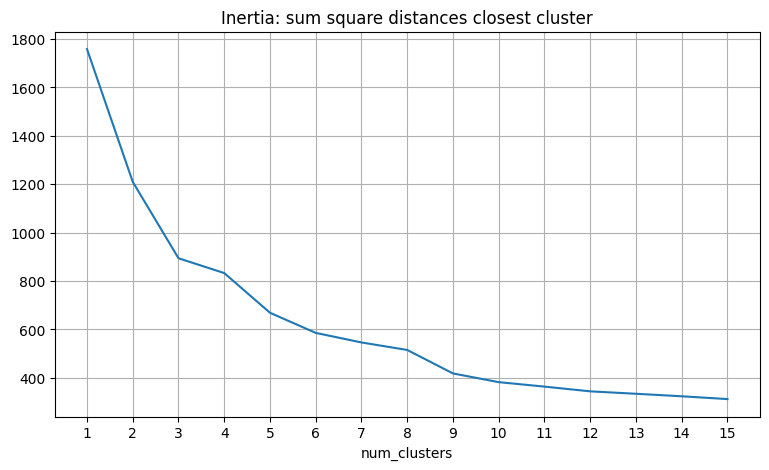

In [83]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.title('Inertia: sum square distances closest cluster')
plt.plot(np.arange(1,max_K+1), inertia_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('num_clusters')
plt.grid()

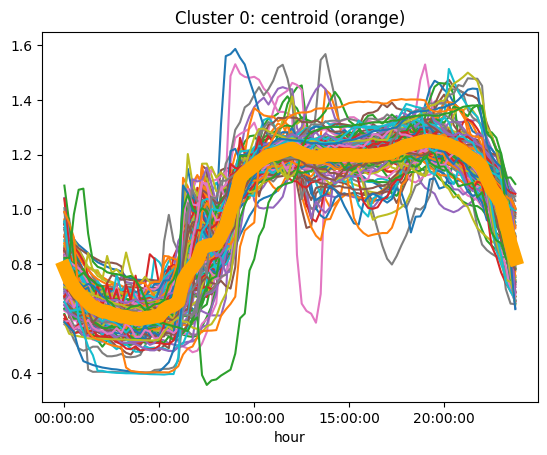

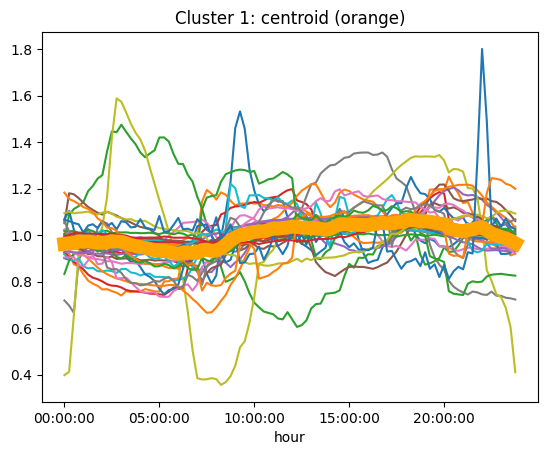

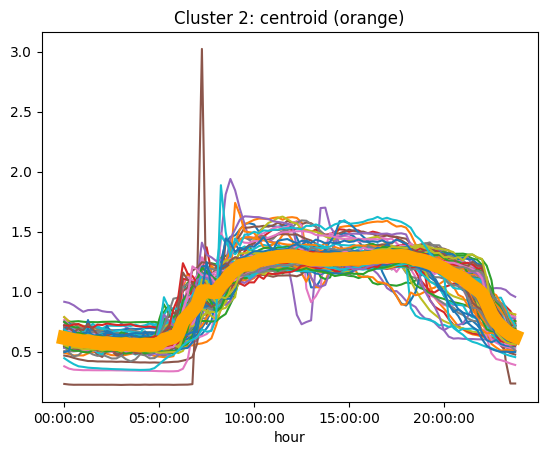

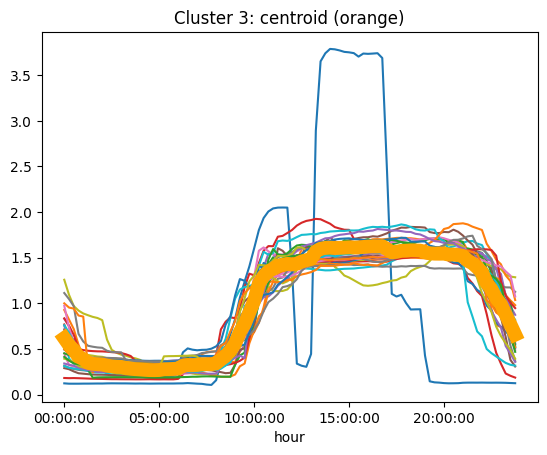

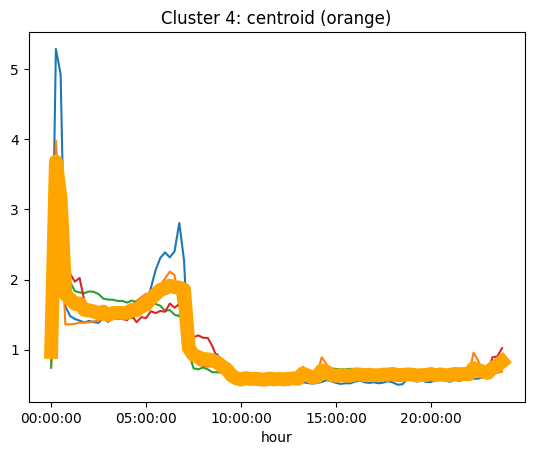

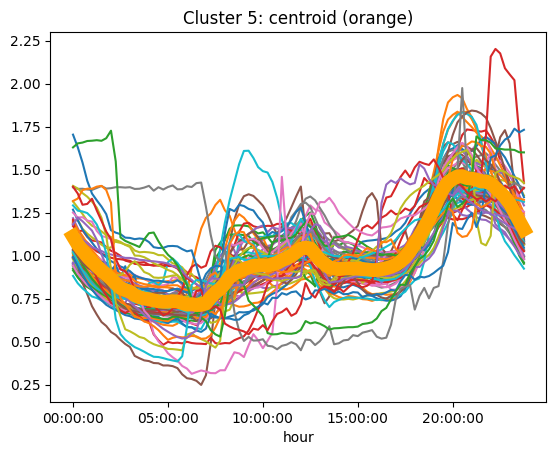

In [85]:
K = 6
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

for c in range(K):
    avg_curves_norm.T[kmeans.labels_ == c].T.plot(legend=False)
    plt.plot(kmeans.cluster_centers_[c], linewidth=10, color='orange')
    plt.title('Cluster '+str(c)+": centroid (orange)")
    plt.show()

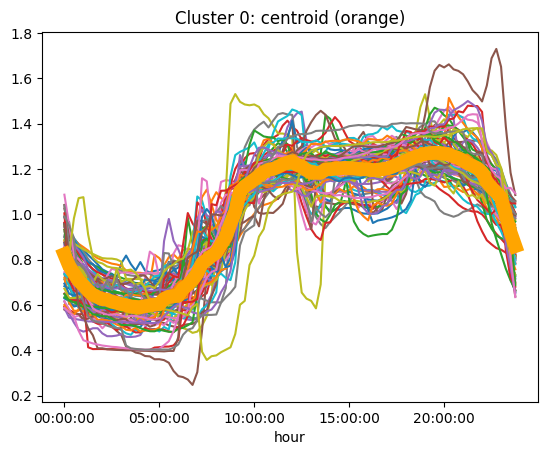

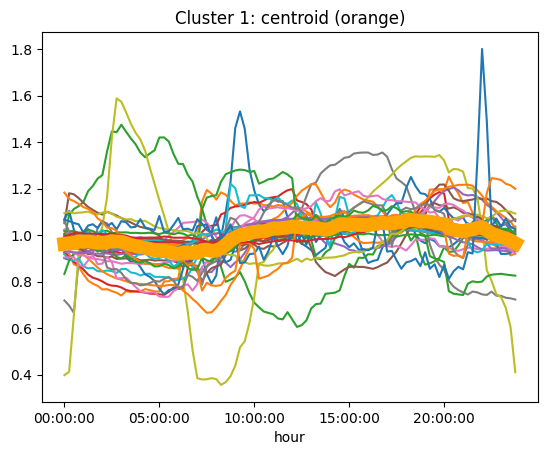

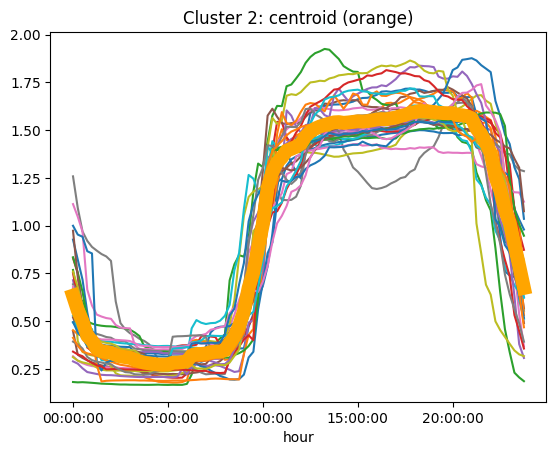

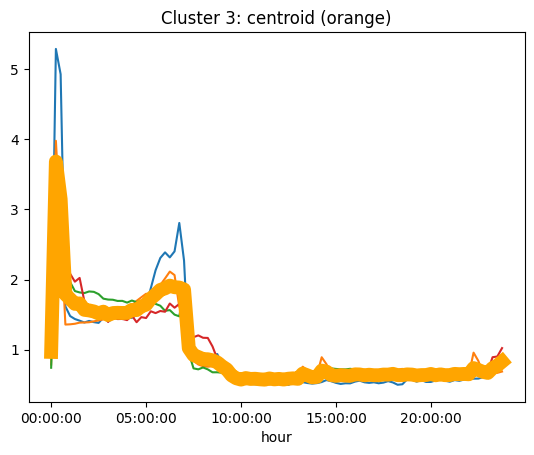

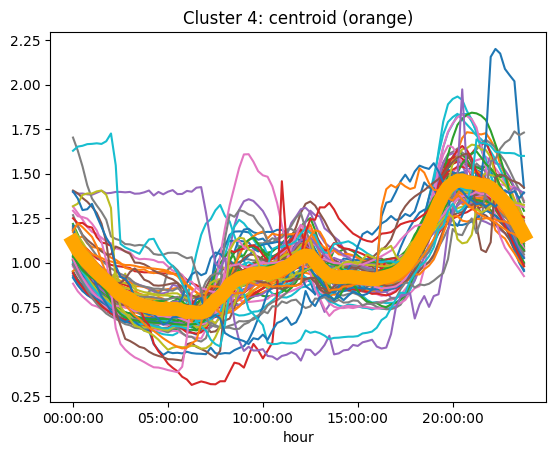

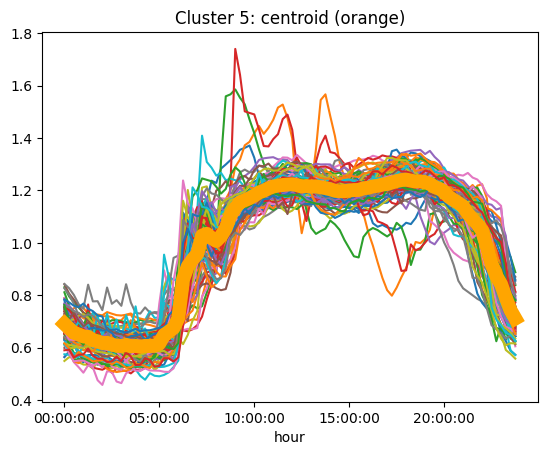

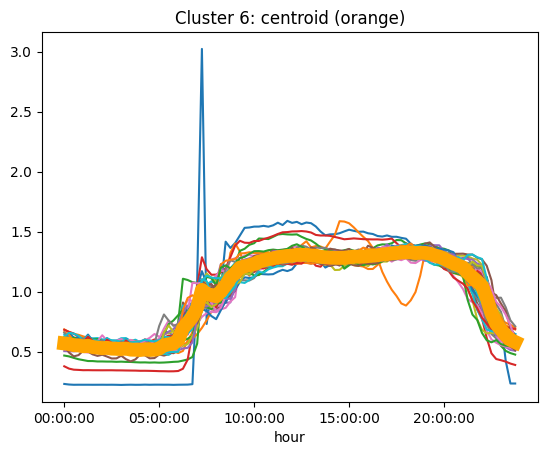

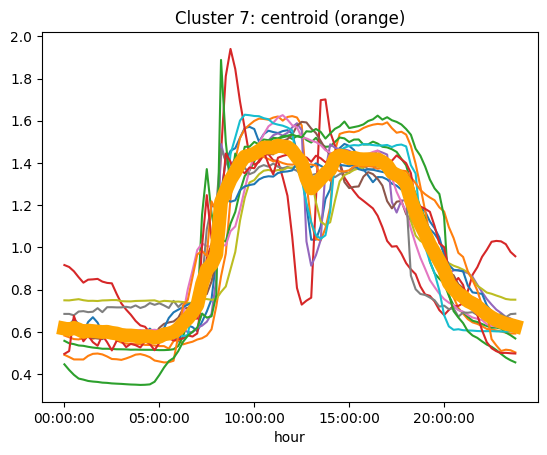

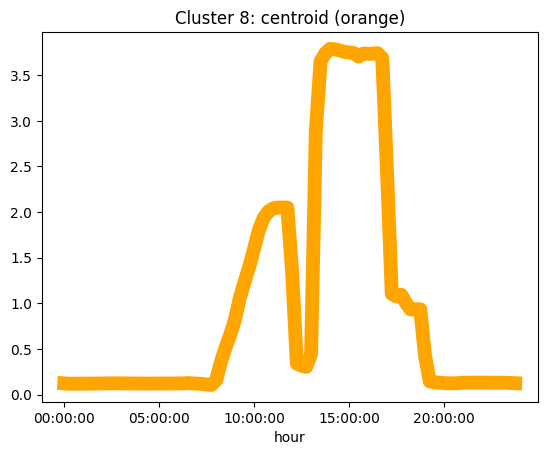

In [86]:
K = 9
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

for c in range(K):
    avg_curves_norm.T[kmeans.labels_ == c].T.plot(legend=False)
    plt.plot(kmeans.cluster_centers_[c], linewidth=10, color='orange')
    plt.title('Cluster '+str(c)+": centroid (orange)")
    plt.show()

In [ ]:
# take a look at single users patterns between weekday and weekend patterns